# Exercise 1

   Write python code which takes as input the number of trials N (i.e., coins that are being flipped) and the number of successes x (out of N), and reports the observed probability: P(N,x) for a coin flip (assuming p(heads or tails) = 0.5). DO NOT USE the binomial formula. Instead, use the frequentist technique of averaging over a large set of M realizations from a random variable.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
%matplotlib inline
rc('figure', figsize=(11.0, 9.0)) # easy way to re-size a figure
rc('animation', html='html5')

a. Plot the outcome. How will you average over a large set of M realizations? How large does M need need to be?

In [21]:
#Defines variables
cpf = 40 #"coins per flip" 
n = cpf + 1 #total outcomes of heads per flip
M = 100000 #total coin flips

In [22]:
#Numerically calculates Binomial Distribution function
from scipy.misc import factorial
#Binomial distribution for probability of x=0.5 from 10 trials
def PNx(N):
    p = 0.5
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((0.5)**N)
    return PNx
print(PNx(cpf))

[9.09494702e-13 3.63797881e-11 7.09405867e-10 8.98580765e-09
 8.31187208e-08 5.98454790e-07 3.49098627e-06 1.69562190e-05
 6.99444035e-05 2.48691213e-04 7.70942759e-04 2.10257116e-03
 5.08121364e-03 1.09441525e-02 2.11065797e-02 3.65847382e-02
 5.71636534e-02 8.07016284e-02 1.03118747e-01 1.19400655e-01
 1.25370688e-01 1.19400655e-01 1.03118747e-01 8.07016284e-02
 5.71636534e-02 3.65847382e-02 2.11065797e-02 1.09441525e-02
 5.08121364e-03 2.10257116e-03 7.70942759e-04 2.48691213e-04
 6.99444035e-05 1.69562190e-05 3.49098627e-06 5.98454790e-07
 8.31187208e-08 8.98580765e-09 7.09405867e-10 3.63797881e-11
 9.09494702e-13]


/usr/local/anaconda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  import sys


[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 4.0000e+00 6.0000e+00 2.7000e+01 7.0000e+01 2.1300e+02
 5.6400e+02 1.0590e+03 2.2110e+03 3.6260e+03 5.6530e+03 8.0800e+03
 1.0278e+04 1.2059e+04 1.2583e+04 1.1902e+04 1.0241e+04 8.0240e+03
 5.7010e+03 3.7250e+03 2.0920e+03 1.0640e+03 4.9200e+02 2.1100e+02
 8.2000e+01 2.2000e+01 9.0000e+00 2.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00]


/usr/local/anaconda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  import sys


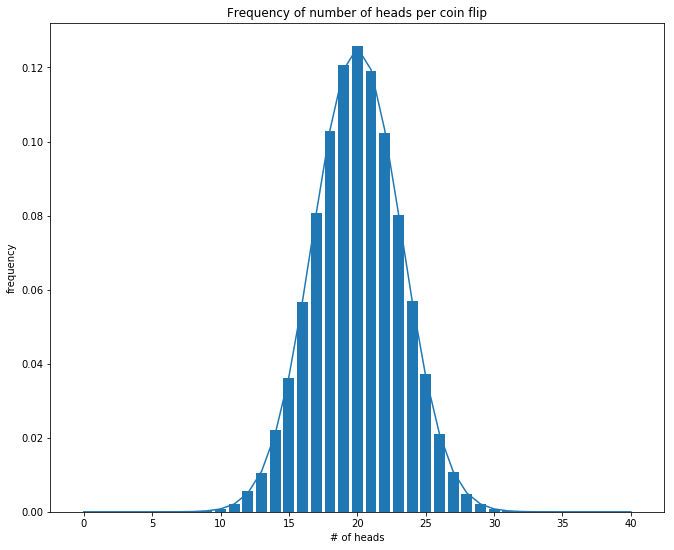

In [34]:
#Runs experiments and plots results
#runs coin flip of cpf coins M times and indexes results
counts = np.zeros(n)
for i in range(0,M):
        draw = np.random.randint(2, size=cpf)
        heads_count = len(draw[(np.where(draw == 1))])
        tails_count = len(draw[(np.where(draw == 0))])
        counts[heads_count] = counts[heads_count] + 1
print (counts)
#plots histogram of coin flip results
plt.bar(np.arange(n), counts/M)
plt.title("Frequency of number of heads per coin flip")
plt.xlabel("# of heads")
plt.ylabel("frequency")
#plots Binomial Distribution function against coin flip results
plt.plot(np.arange(n), PNx(cpf))

f. The expectation value for x is defined as (x)xP(x)E=∑N0 . Using your python code, numerically calculate the expectation value for the number of successful outcomes i for N=20trials and N=40 trials. (assume coin flip, p=0.5).  This code should be in the jupyter notebook you submit and share with the instructor on bitbucket.  How do these expectation values compare to the analytical mean of the binomial probability distribution: Npμ=,  where N is the number of trials and p is the probability of success?

In [24]:
#Numerically calculated expectation value

# Function to calculate expectation 
def Expectation_Value(a, b): 
# variable prb is probability of each element
    prb = 1 / b 

# calculating expectation overall 
    sum = 0
    for i in range(0, b): 
        sum += (a[i] * prb) 

# returning expectation as sum 
    return float(sum) 

b = n 
a = np.arange(n)
print( "Expectation value : " , Expectation_Value(a, b))

Expectation value :  20.000000000000004


In [33]:
#Analytical average of Binomial Distribution
p=0.5
mu=cpf*p
print("Analytical average :",mu)
#Error 
error=100*((Expectation_Value(a, b)-mu)/mu)
print("Accuracy of numerical expectation value :",error, "%")

Analytical average : 20.0
Accuracy of numerical expectation value : 1.7763568394002505e-14 %


# Exercise 2 - Binomial to Gaussian PDF

a. In the limit of small p, we can derive the Poisson probability distribution function from the binomial PDF.  Please show in the Theory section of your report that for p<<1, the binomialtheorem can be simplified.

In [71]:
def PNx(N):
    p = 0.05
    mu = N*p
    x = (np.arange(N))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*p**x*(1-p)**(N-x)
    return PNx
print(PNx(101))

[5.62450276e-003 2.98986726e-002 7.86807173e-002 1.36655983e-001
 1.76214293e-001 1.79924068e-001 1.51515005e-001 1.08225003e-001
 6.69286205e-002 3.63997760e-002 1.76251547e-002 7.67411043e-003
 3.02925412e-003 1.09151262e-003 3.61101918e-004 1.10231112e-004
 3.11838014e-005 8.20626352e-006 2.01557350e-006 4.63414405e-007
 9.99999506e-008 2.03007418e-008 3.88530944e-009 7.02378595e-010
 1.20143707e-010 1.94759273e-011 2.99629650e-012 4.38055044e-013
 6.09324685e-014 8.07272269e-015 1.01971234e-015 1.22919484e-016
 1.41519143e-017 1.55738770e-018 1.63935547e-019 1.65168145e-020
 1.59372772e-021 1.47357470e-022 1.30621580e-023 1.11054785e-024
 9.05973244e-026 7.09427059e-027 5.33403804e-028 3.85199809e-029
 2.67243887e-030 1.78162591e-031 1.14154521e-032 7.03079355e-034
 4.16296986e-035 2.36989692e-036 1.29720673e-037 6.82740386e-039
 3.45516389e-040 1.68126148e-041 7.86555077e-043 3.53761614e-044
 1.52942051e-045 6.35493287e-047 2.53735977e-048 9.73295896e-050
 3.58582699e-051 1.268497

/usr/local/anaconda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  """


b. Re-write your code for the experimental binomial probability to allow for a variable probability of success. Now plot the histogram of P(100,x) for small p.

[5.3500e+02 2.9560e+03 7.9570e+03 1.3548e+04 1.7804e+04 1.8011e+04
 1.5083e+04 1.0672e+04 6.6830e+03 3.7630e+03 1.7590e+03 7.5400e+02
 3.0500e+02 1.2100e+02 3.0000e+01 1.5000e+01 4.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000

/usr/local/anaconda/envs/python3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  """


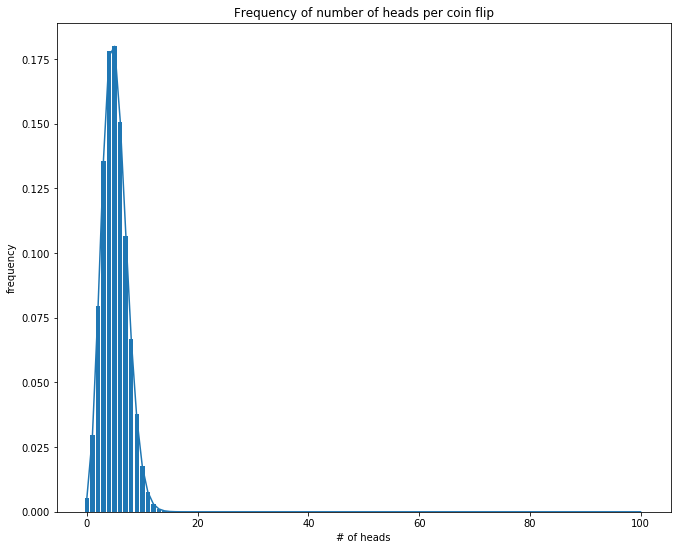

In [73]:
p=0.05
n=101
counts = np.zeros(n)
for i in range(0,M):
        draw = np.random.random(size=n)
        heads_count = len(draw[(np.where(draw <= p))])
        tails_count = len(draw[(np.where(draw > p))])
        counts[heads_count] = counts[heads_count] + 1
print (counts)
plt.bar(np.arange(n), counts/M)
plt.title("Frequency of number of heads per coin flip")
plt.xlabel("# of heads")
plt.ylabel("frequency")
plt.plot(np.arange(n), PNx(101))